In [1]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt


In [2]:
#Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map
m = folium.Map([28.3949, 84.1240], zoom_start=7)
boundsdata = r'C:\Omdena\map.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [45]:
#Connect to OpenAccessHub
user = 'wfp2019' 
password = 'wfp2019#' 

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')


In [44]:
#Search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)


POLYGON((80.0464 28.8832,80.5078 28.5556,80.5188 28.7099,81.2219 28.3237,82.6501 27.7030,83.4851 27.7419,86.5942 26.6671,87.2424 26.8143,88.3630 26.7652,88.6926 27.0004,88.8574 27.3327,88.8135 27.5667,88.8354 27.9653,88.5828 28.1301,88.3630 27.9750,87.8357 27.9362,87.5940 27.8294,87.1326 27.8391,86.7151 28.1011,86.5723 28.1107,86.4294 27.8779,86.1768 28.1301,86.0559 27.8682,86.0889 28.0526,85.9680 27.9556,85.6934 28.3721,85.5725 28.3044,85.1221 28.3141,85.1331 28.6713,84.9243 28.5845,84.2432 28.9216,84.1882 29.2001,83.9575 29.3535,83.6389 29.1713,83.4631 29.3535,83.2544 29.5543,82.7600 29.8025,82.2107 30.0691,82.1008 30.3539,81.4417 30.5055,81.2219 30.0406,80.9363 30.2591,80.3979 29.8502,80.0464 28.8832))


In [31]:
#Search for images that fall with the date range 01 Jan 2018 - 31 Dec 2018, we want sentinel 2 level2A and cloud cover of 0-30%

products = api.query(footprint,
                     date = ('20181001', '20181231'),                     
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 30))

In [33]:
print(len(products))


92


In [36]:
#Show results in a table
api.to_geodataframe(products)


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
013b5503-6607-4151-8606-0fb0ae10245c,S2A_MSIL2A_20181229T045211_N0211_R076_T45RVL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-29T04:52:11.024Z, Instrument: MS...",2018-12-29 09:26:04.516,2018-12-29 04:52:11.024,2018-12-29 04:52:11.024,18377,76,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.09 GB,013b5503-6607-4151-8606-0fb0ae10245c,"POLYGON ((85.98235868655983 28.02166745577606,..."
060c0e03-58bf-4fdc-ad71-b492145b538a,S2A_MSIL2A_20181218T052221_N0211_R062_T44RLS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-18T05:22:21.024Z, Instrument: MS...",2018-12-18 10:04:03.652,2018-12-18 05:22:21.024,2018-12-18 05:22:21.024,18220,62,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,060c0e03-58bf-4fdc-ad71-b492145b538a,"POLYGON ((78.94856806237456 28.9126538873101, ..."
078c1f96-12ee-4a28-bbfc-a1261e889af4,S2B_MSIL2A_20181220T051219_N0211_R019_T44RPR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-20T05:12:19.024Z, Instrument: MS...",2018-12-20 12:41:36.623,2018-12-20 05:12:19.024,2018-12-20 05:12:19.024,9340,19,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.06 GB,078c1f96-12ee-4a28-bbfc-a1261e889af4,"POLYGON ((83.11640034621703 27.10916575752936,..."
07a9fc2c-229b-430f-b8ba-d26f33042307,S2B_MSIL2A_20181223T052229_N0211_R062_T44RNT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-23T05:22:29.024Z, Instrument: MS...",2018-12-23 13:01:25.836,2018-12-23 05:22:29.024,2018-12-23 05:22:29.024,9383,62,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,264.95 MB,07a9fc2c-229b-430f-b8ba-d26f33042307,"POLYGON ((81.35190314694695 29.82895334814479,..."
08cd792a-d59b-4071-9fa0-88eadf9d136d,S2B_MSIL2A_20181227T050219_N0211_R119_T44RQR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-27T05:02:19.024Z, Instrument: MS...",2018-12-27 15:34:10.294,2018-12-27 05:02:19.024,2018-12-27 05:02:19.024,9440,119,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.04 GB,08cd792a-d59b-4071-9fa0-88eadf9d136d,"POLYGON ((83.03366975023373 28.01038669620816,..."
0a29754a-33dd-419c-a25e-01ad659a702e,S2A_MSIL2A_20181215T051211_N0211_R019_T44RNR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-15T05:12:11.024Z, Instrument: MS...",2018-12-15 10:14:27.968,2018-12-15 05:12:11.024,2018-12-15 05:12:11.024,18177,19,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,0a29754a-33dd-419c-a25e-01ad659a702e,"POLYGON ((80.99979654001324 28.02543553141904,..."
0e904b01-8df9-4894-ae64-f4bff68143ad,S2B_MSIL2A_20181227T050219_N0211_R119_T44RPR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-27T05:02:19.024Z, Instrument: MS...",2018-12-27 15:27:24.161,2018-12-27 05:02:19.024,2018-12-27 05:02:19.024,9440,119,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,489.72 MB,0e904b01-8df9-4894-ae64-f4bff68143ad,"POLYGON ((82.566578293

In [37]:
print (areas)

                                                                                  title  \
013b5503-6607-4151-8606-0fb0ae10245c  S2A_MSIL2A_20181229T045211_N0211_R076_T45RVL_2...   
060c0e03-58bf-4fdc-ad71-b492145b538a  S2A_MSIL2A_20181218T052221_N0211_R062_T44RLS_2...   
078c1f96-12ee-4a28-bbfc-a1261e889af4  S2B_MSIL2A_20181220T051219_N0211_R019_T44RPR_2...   
07a9fc2c-229b-430f-b8ba-d26f33042307  S2B_MSIL2A_20181223T052229_N0211_R062_T44RNT_2...   
08cd792a-d59b-4071-9fa0-88eadf9d136d  S2B_MSIL2A_20181227T050219_N0211_R119_T44RQR_2...   
0a29754a-33dd-419c-a25e-01ad659a702e  S2A_MSIL2A_20181215T051211_N0211_R019_T44RNR_2...   
0e904b01-8df9-4894-ae64-f4bff68143ad  S2B_MSIL2A_20181227T050219_N0211_R119_T44RPR_2...   
1384c2ab-795f-4f82-9f7a-e06da39dbd16  S2B_MSIL2A_20181221T044209_N0211_R033_T45RWK_2...   
15e4aaeb-801f-45b9-a8f1-0b4ad2096450  S2B_MSIL2A_20181220T051219_N0211_R019_T44RNS_2...   
16a9fe2d-c107-40b0-9e20-31ac498e2699  S2A_MSIL2A_20181229T045211_N0211_R076_T45RVK_2...   

[92 rows x 34 columns]


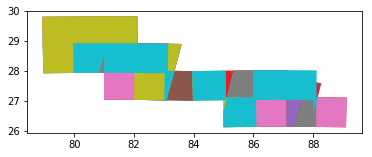

In [38]:
#Plot the table as a GeoPandas dataframe, based on the uuid field
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

013b5503-6607-4151-8606-0fb0ae10245c    Annotation(86.5429,27.5287,'013b5503-6607-4151...
060c0e03-58bf-4fdc-ad71-b492145b538a    Annotation(79.5185,28.4243,'060c0e03-58bf-4fdc...
078c1f96-12ee-4a28-bbfc-a1261e889af4    Annotation(82.5679,27.521,'078c1f96-12ee-4a28-...
07a9fc2c-229b-430f-b8ba-d26f33042307    Annotation(81.1228,29.4393,'07a9fc2c-229b-430f...
08cd792a-d59b-4071-9fa0-88eadf9d136d    Annotation(83.5799,27.5055,'08cd792a-d59b-4071...
0a29754a-33dd-419c-a25e-01ad659a702e    Annotation(81.5557,27.5283,'0a29754a-33dd-419c...
0e904b01-8df9-4894-ae64-f4bff68143ad    Annotation(82.9009,27.4729,'0e904b01-8df9-4894...
1384c2ab-795f-4f82-9f7a-e06da39dbd16    Annotation(87.8008,26.591,'1384c2ab-795f-4f82-...
15e4aaeb-801f-45b9-a8f1-0b4ad2096450    Annotation(81.5604,28.4312,'15e4aaeb-801f-45b9...
16a9fe2d-c107-40b0-9e20-31ac498e2699    Annotation(86.5465,26.6257,'16a9fe2d-c107-40b0...
176401bf-f218-45b4-8c52-98b1a9ff5f63    Annotation(85.6454,27.4978,'176401bf-f218-45b4...
17c03abe-5

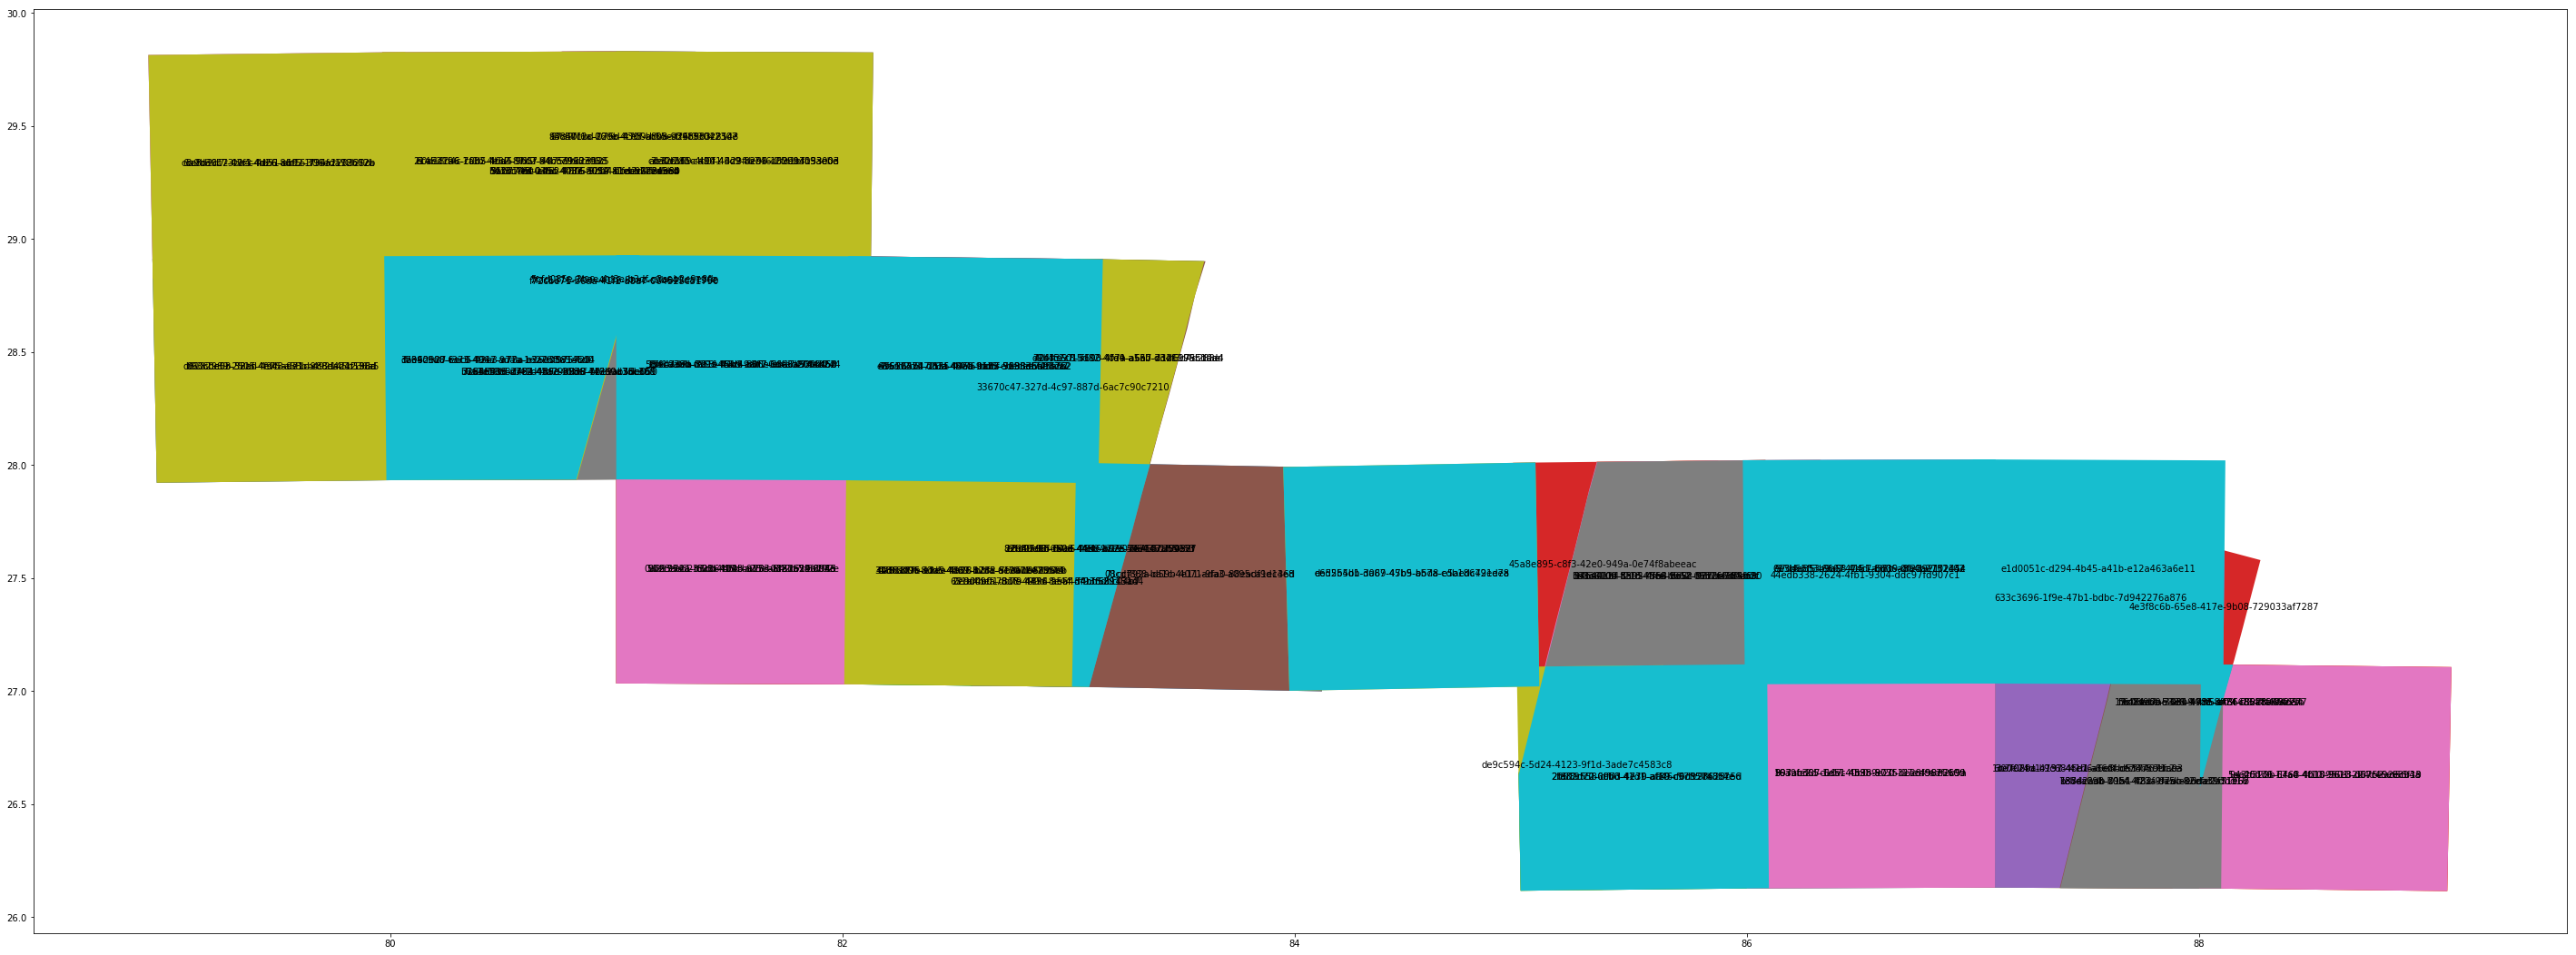

In [42]:
#Label the polygons
ax = areas.plot(column='uuid', cmap=None, figsize=(50, 50))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


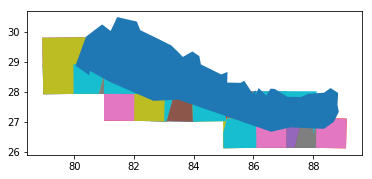

In [41]:
#use geopandas to check which scene to download
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()


In [46]:
#Get the uuid and inspect produuct data
api.get_product_odata('ded255bb-3a87-45b9-ab7a-cdb186791e7a')


{'Creation Date': datetime.datetime(2018, 12, 27, 15, 45, 41, 372000),
 'Ingestion Date': datetime.datetime(2018, 12, 27, 15, 26, 3, 899000),
 'Online': True,
 'date': datetime.datetime(2018, 12, 27, 5, 2, 19, 24000),
 'footprint': 'POLYGON((83.94966291515031 27.991577831689415,85.06534249241301 28.011816421914702,85.08260664643534 27.02111225850134,83.9768526405984 27.001706217086564,83.94966291515031 27.991577831689415))',
 'id': 'ded255bb-3a87-45b9-ab7a-cdb186791e7a',
 'md5': '49B923DE1E55FAECF7662D0512E66DD9',
 'size': 1114177112,
 'title': 'S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ded255bb-3a87-45b9-ab7a-cdb186791e7a')/$value"}

In [47]:
#Download the data
api.download('ded255bb-3a87-45b9-ab7a-cdb186791e7a')


Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.11G/1.11G [30:47<00:00, 705kB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.11G/1.11G [00:06<00:00, 166MB/s]


{'Creation Date': datetime.datetime(2018, 12, 27, 15, 45, 41, 372000),
 'Ingestion Date': datetime.datetime(2018, 12, 27, 15, 26, 3, 899000),
 'Online': True,
 'date': datetime.datetime(2018, 12, 27, 5, 2, 19, 24000),
 'downloaded_bytes': 1114177112,
 'footprint': 'POLYGON((83.94966291515031 27.991577831689415,85.06534249241301 28.011816421914702,85.08260664643534 27.02111225850134,83.9768526405984 27.001706217086564,83.94966291515031 27.991577831689415))',
 'id': 'ded255bb-3a87-45b9-ab7a-cdb186791e7a',
 'md5': '49B923DE1E55FAECF7662D0512E66DD9',
 'path': '.\\S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.zip',
 'size': 1114177112,
 'title': 'S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ded255bb-3a87-45b9-ab7a-cdb186791e7a')/$value"}

In [50]:
#Path to unzip
path_tozip = Out[47]['path'] 

In [51]:
import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python
zip_ref = zipfile.ZipFile(path_tozip, 'r')
zip_ref.extractall(r'C:\Omdena')
zip_ref.close()